## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing double
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

import warnings
warnings.filterwarnings('ignore')

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is A239-1DCD

 Directory of C:\Users\HP\Documents\EXCELR ASSIGNMENTS\Forecasting Assignment

16-01-2023  22:14    <DIR>          .
16-01-2023  22:14    <DIR>          ..
07-01-2023  21:17    <DIR>          .ipynb_checkpoints
06-01-2023  23:08             9,559 Airlines+Data.xlsx
06-01-2023  23:08             9,422 CocaCola_Sales_Rawdata.xlsx
16-01-2023  22:14           470,706 Forecasting Assignment.ipynb
06-01-2023  23:08               233 Problem_statement.txt
               4 File(s)        489,920 bytes
               3 Dir(s)  151,160,049,664 bytes free


# Q.1. CocaCola Sales

## Importing Data

In [3]:
CocaCola_Sales_Rawdata=pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

In [4]:
CocaCola_Sales_Rawdata.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


## EDA

In [5]:
CocaCola_Sales_Rawdata.dtypes

Quarter     object
Sales      float64
dtype: object

In [6]:
CocaCola_Sales_Rawdata.shape

(42, 2)

In [7]:
CocaCola_Sales_Rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [8]:
CocaCola_Sales_Rawdata.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [9]:
CocaCola_Sales_Rawdata.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [10]:
CocaCola_Sales_Rawdata.columns

Index(['Quarter', 'Sales'], dtype='object')

In [11]:
len(CocaCola_Sales_Rawdata)

42

In [12]:
CocaCola_Sales_Rawdata=CocaCola_Sales_Rawdata.set_index('Quarter')

In [13]:
CocaCola_Sales_Rawdata.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [14]:
CocaCola_Sales_Rawdata.index

Index(['Q1_86', 'Q2_86', 'Q3_86', 'Q4_86', 'Q1_87', 'Q2_87', 'Q3_87', 'Q4_87',
       'Q1_88', 'Q2_88', 'Q3_88', 'Q4_88', 'Q1_89', 'Q2_89', 'Q3_89', 'Q4_89',
       'Q1_90', 'Q2_90', 'Q3_90', 'Q4_90', 'Q1_91', 'Q2_91', 'Q3_91', 'Q4_91',
       'Q1_92', 'Q2_92', 'Q3_92', 'Q4_92', 'Q1_93', 'Q2_93', 'Q3_93', 'Q4_93',
       'Q1_94', 'Q2_94', 'Q3_94', 'Q4_94', 'Q1_95', 'Q2_95', 'Q3_95', 'Q4_95',
       'Q1_96', 'Q2_96'],
      dtype='object', name='Quarter')

In [15]:
CocaCola_Sales_Rawdata.index = CocaCola_Sales_Rawdata.index.str.replace(r'(Q\d)_(\d+)', r'\2-\1')
CocaCola_Sales_Rawdata.head()

,Sales
Quarter,
86-Q1,1734.827000
86-Q2,2244.960999
86-Q3,2533.804993
86-Q4,2154.962997
87-Q1,1547.818996


In [16]:
CocaCola_Sales_Rawdata.index = pd.PeriodIndex(CocaCola_Sales_Rawdata.index, freq='Q').to_timestamp()
CocaCola_Sales_Rawdata.head()

,Sales
Quarter,
2086-01-01,1734.827000
2086-04-01,2244.960999
2086-07-01,2533.804993
2086-10-01,2154.962997
2087-01-01,1547.818996


In [17]:
CocaCola_Sales_Rawdata.index

DatetimeIndex(['2086-01-01', '2086-04-01', '2086-07-01', '2086-10-01',
               '2087-01-01', '2087-04-01', '2087-07-01', '2087-10-01',
               '2088-01-01', '2088-04-01', '2088-07-01', '2088-10-01',
               '2089-01-01', '2089-04-01', '2089-07-01', '2089-10-01',
               '2090-01-01', '2090-04-01', '2090-07-01', '2090-10-01',
               '2091-01-01', '2091-04-01', '2091-07-01', '2091-10-01',
               '2092-01-01', '2092-04-01', '2092-07-01', '2092-10-01',
               '2093-01-01', '2093-04-01', '2093-07-01', '2093-10-01',
               '2094-01-01', '2094-04-01', '2094-07-01', '2094-10-01',
               '2095-01-01', '2095-04-01', '2095-07-01', '2095-10-01',
               '2096-01-01', '2096-04-01'],
              dtype='datetime64[ns]', name='Quarter', freq='QS-OCT')

## Visualization

### 1. Line Plot

<AxesSubplot:xlabel='Quarter'>

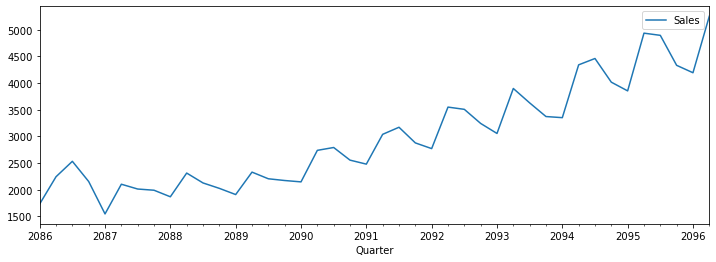

In [18]:
CocaCola_Sales_Rawdata.plot(figsize=(12,4))

### 2. Histogram

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

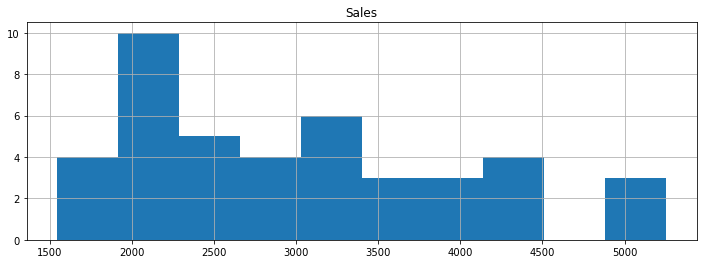

In [19]:
CocaCola_Sales_Rawdata.hist(figsize=(12,4))

## Time Series Decomposition

### a. Additive Seasonal Decompose

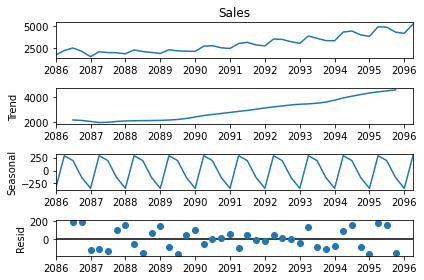

In [20]:
decompose_ts_add = seasonal_decompose(CocaCola_Sales_Rawdata.Sales,model="additive",period=4)
decompose_ts_add.plot()
plt.show()

### b. Multiplicative Seasonal Decompose

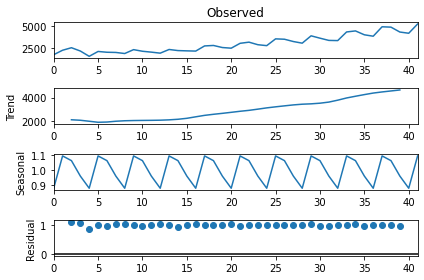

In [21]:
decompose_ts_mul= seasonal_decompose((CocaCola_Sales_Rawdata.values),model='multiplicative',period=4)
decompose_ts_mul.plot()
plt.show()

## Splitting Data into Training and Testing Data

In [22]:
CocaCola_Sales_Rawdata_train=CocaCola_Sales_Rawdata[0:28]
CocaCola_Sales_Rawdata_test=CocaCola_Sales_Rawdata[28:]

In [23]:
len(CocaCola_Sales_Rawdata_train)

28

In [24]:
len(CocaCola_Sales_Rawdata_test)

14

## Method of Forecasting

### 1. Simple Moving Average

In [25]:
CocaCola_Sales_Rawdata_ma=CocaCola_Sales_Rawdata.copy()

In [26]:
CocaCola_Sales_Rawdata_train_len=28

In [27]:
roll_val=[]
rmse_val=[]

for i in range(4,28,4):
    CocaCola_Sales_Rawdata_ma['ma_forecast'] = CocaCola_Sales_Rawdata_ma['Sales'].rolling(i).mean()
    CocaCola_Sales_Rawdata_ma['ma_forecast'][CocaCola_Sales_Rawdata_train_len:] = CocaCola_Sales_Rawdata_ma['ma_forecast'][CocaCola_Sales_Rawdata_train_len-1]
    rmse_ma = mean_squared_error(CocaCola_Sales_Rawdata_test['Sales'],CocaCola_Sales_Rawdata_ma['ma_forecast'][CocaCola_Sales_Rawdata_train_len:],squared=False).round(2)
    roll_val.append(i)
    rmse_val.append(rmse_ma)


In [28]:
CocaCola_Sales_Rawdata_ma['ma_forecast'] = CocaCola_Sales_Rawdata_ma['Sales'].rolling(4).mean()
CocaCola_Sales_Rawdata_ma['ma_forecast'][CocaCola_Sales_Rawdata_train_len:] = CocaCola_Sales_Rawdata_ma['ma_forecast'][CocaCola_Sales_Rawdata_train_len-1]
rmse_ma = mean_squared_error(CocaCola_Sales_Rawdata_test['Sales'],CocaCola_Sales_Rawdata_ma['ma_forecast'][CocaCola_Sales_Rawdata_train_len:],squared=False).round(2)
rmse_ma

1049.59

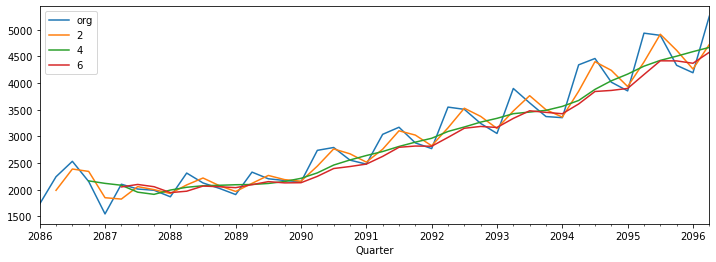

In [29]:
plt.figure(figsize=(12,4))
CocaCola_Sales_Rawdata.Sales.plot(label="org")
for i in range(2,8,2):
    CocaCola_Sales_Rawdata["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

### Evaluation Metric RMSE

In [30]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

### 2. Simple Exponential Method

In [31]:
ses_model = SimpleExpSmoothing(CocaCola_Sales_Rawdata_train["Sales"]).fit()
pred_ses = ses_model.predict(start = CocaCola_Sales_Rawdata_test.index[0],end = CocaCola_Sales_Rawdata_test.index[-1])
rmse_ses_model= RMSE(CocaCola_Sales_Rawdata_test.Sales, pred_ses)
rmse_ses_model

1028.4750927894122

## 3. Holt Method

In [32]:
hw_model = Holt(CocaCola_Sales_Rawdata_train["Sales"]).fit()
pred_hw = hw_model.predict(start = CocaCola_Sales_Rawdata_test.index[0],end =CocaCola_Sales_Rawdata_test.index[-1])
rmse_hw_model = RMSE(CocaCola_Sales_Rawdata_test.Sales, pred_hw)
rmse_hw_model

428.66228023143833

### a.  Holts winter exponential smoothing with additive seasonality and additive trend

In [33]:
hwe_model_add_add = ExponentialSmoothing(CocaCola_Sales_Rawdata_train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = CocaCola_Sales_Rawdata_test.index[0],end = CocaCola_Sales_Rawdata_test.index[-1])
rmse_hwe_add_add_model = RMSE(CocaCola_Sales_Rawdata_test.Sales, pred_hwe_add_add)
rmse_hwe_add_add_model

546.144302460468

### b. Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [34]:
hwe_model_mul_add = ExponentialSmoothing(CocaCola_Sales_Rawdata_train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = CocaCola_Sales_Rawdata_test.index[0],end =  CocaCola_Sales_Rawdata_test.index[-1])
rmse_hwe_model_mul_add_model = RMSE( CocaCola_Sales_Rawdata_test.Sales, pred_hwe_mul_add)
rmse_hwe_model_mul_add_model

720.9701796357706

## 4. ARIMA Model

### a. acf plot

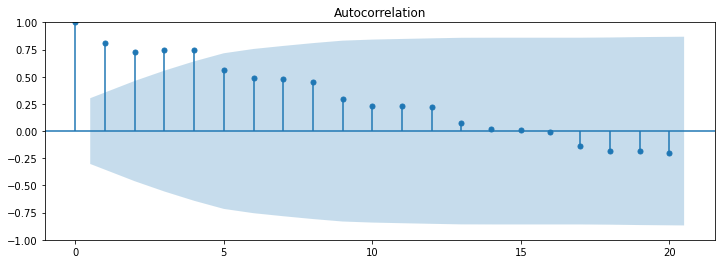

In [35]:
# Show autocorrelation upto lag 20
plt.figure(figsize=(12,4))
acf_plot = plot_acf(CocaCola_Sales_Rawdata['Sales'],ax=plt.gca(),lags=20)
plt.show()

### b. pacf plot

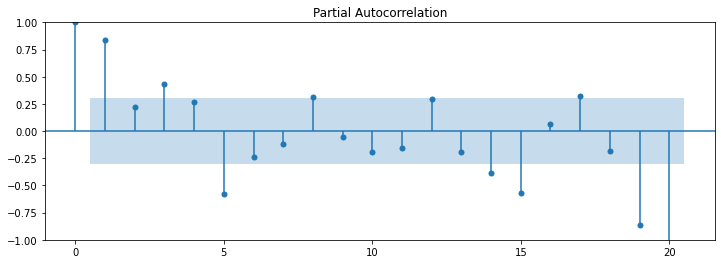

In [36]:
plt.figure(figsize=(12,4))
pacf_plot = plot_pacf(CocaCola_Sales_Rawdata['Sales'],ax=plt.gca(),lags=20)
plt.show()

In [37]:
arima = ARIMA(CocaCola_Sales_Rawdata_train['Sales'], order=(1,1,1)).fit()
pred_arima= arima.predict(start = CocaCola_Sales_Rawdata_test.index[0],end = CocaCola_Sales_Rawdata_test.index[-1])
rmse_arima = mean_squared_error(CocaCola_Sales_Rawdata_test['Sales'],pred_arima,squared=False).round(2)
rmse_arima

1062.27

## Choosing the best model

In [38]:
models=['Simple_Moving_Average','Simple_Exponential_Smoothing','Holt','Holt_additive','Holt_multiplicative','ARIMA']
rmse=[rmse_ma,rmse_ses_model,rmse_hw_model,rmse_hwe_add_add_model,rmse_hwe_model_mul_add_model,rmse_arima]
d={'Models':models,'Rmse':rmse}
CocaCola_Sales_Rawdata_model=pd.DataFrame(d)
CocaCola_Sales_Rawdata_model

,Models,Rmse
0,Simple_Moving_Average,1049.590000
1,Simple_Exponential_Smoothing,1028.475093
2,Holt,428.662280
3,Holt_additive,546.144302
4,Holt_multiplicative,720.970180
5,ARIMA,1062.270000


In [39]:
CocaCola_Sales_Rawdata_model.sort_values(by='Rmse')

,Models,Rmse
2,Holt,428.662280
3,Holt_additive,546.144302
4,Holt_multiplicative,720.970180
1,Simple_Exponential_Smoothing,1028.475093
0,Simple_Moving_Average,1049.590000
5,ARIMA,1062.270000


## Inference

#### Holt Method is the best model as it has least Rmse.

# Q.2. Airlines+Data

## Importing Data

In [40]:
Airlines_data = pd.read_excel('Airlines+Data.xlsx')

In [41]:
Airlines_data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


## EDA

In [42]:
Airlines_data.shape

(96, 2)

In [43]:
Airlines_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [44]:
Airlines_data.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [45]:
Airlines_data.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [46]:
Airlines_data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [47]:
Airlines_data.set_index('Month', inplace=True)

In [48]:
Airlines_data

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [49]:
Airlines_data.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

In [50]:
Airlines_data.index.freq = 'MS' 

In [51]:
Airlines_data.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

In [52]:
Airlines_data.index.shape

(96,)

In [53]:
Airlines_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [54]:
Airlines_data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [55]:
Airlines_data.value_counts()

Passengers
229           3
237           2
172           2
178           2
180           2
             ..
181           1
171           1
166           1
163           1
413           1
Length: 80, dtype: int64

In [56]:
Airlines_data.duplicated().sum()

16

## Visualization

### a. Line Plot

<AxesSubplot:xlabel='Month'>

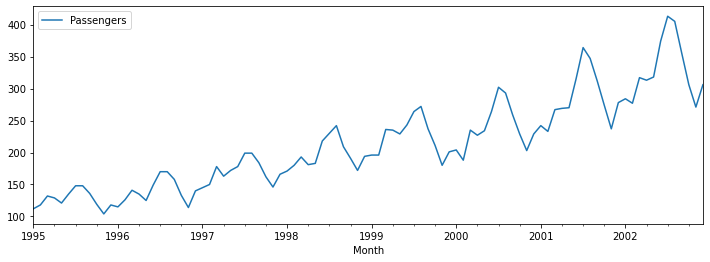

In [57]:
Airlines_data.plot(figsize=(12,4))

### b. Histogram 

array([[<AxesSubplot:title={'center':'Passengers'}>]], dtype=object)

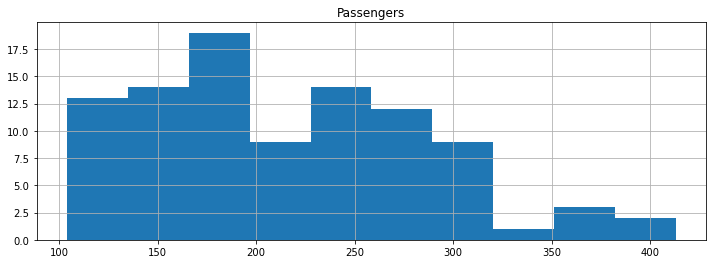

In [58]:
Airlines_data.hist(figsize=(12,4))

## Time Series Decomposition

### a. Additive Seasonal Decompose

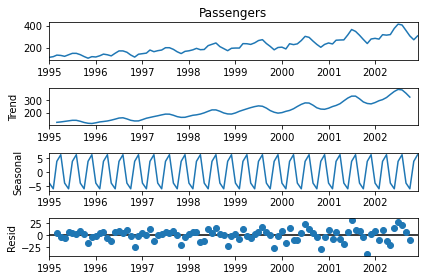

In [59]:
decompose_ts_add = seasonal_decompose(Airlines_data.Passengers,model="additive",period=4)
decompose_ts_add.plot()
plt.show()

### b. Multiplicative Seasonal Decompose

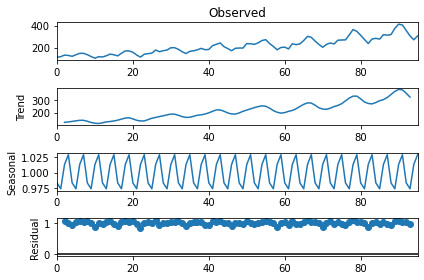

In [60]:
decompose_ts_mul= seasonal_decompose((Airlines_data.Passengers.values),model='multiplicative',period=4)
decompose_ts_mul.plot()
plt.show()

## Splitting Data into Training and Testing Data

In [61]:
Airlines_data_train=Airlines_data[0:72]
Airlines_data_test=Airlines_data[72:]

In [62]:
len(Airlines_data_train)

72

In [63]:
len(Airlines_data_test)

24

In [64]:
Airlines_data_train.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [65]:
Airlines_data_test.head()

,Passengers
Month,
2001-01-01,242
2001-02-01,233
2001-03-01,267
2001-04-01,269
2001-05-01,270


## Method of Forecasting

## 1. Simple Moving Average

In [66]:
Airlines_data_ma=Airlines_data.copy()

In [67]:
Airlines_data_train_len=72

In [68]:
roll_val=[]
rmse_val=[]

for i in range(4,28,4):
    Airlines_data_ma['ma_forecast'] = Airlines_data_ma['Passengers'].rolling(i).mean()
    Airlines_data_ma['ma_forecast'][Airlines_data_train_len:] = Airlines_data_ma['ma_forecast'][Airlines_data_train_len-1]
    rmse_ma = mean_squared_error(Airlines_data_test['Passengers'],Airlines_data_ma['ma_forecast'][Airlines_data_train_len:],squared=False).round(2)
    roll_val.append(i)
    rmse_val.append(rmse_ma)


In [69]:
Airlines_data_ma['ma_forecast'] = Airlines_data_ma['Passengers'].rolling(4).mean()
Airlines_data_ma['ma_forecast'][Airlines_data_train_len:] = Airlines_data_ma['ma_forecast'][Airlines_data_train_len-1]
rmse_ma = mean_squared_error(Airlines_data_test['Passengers'],Airlines_data_ma['ma_forecast'][Airlines_data_train_len:],squared=False).round(2)
rmse_ma

90.27

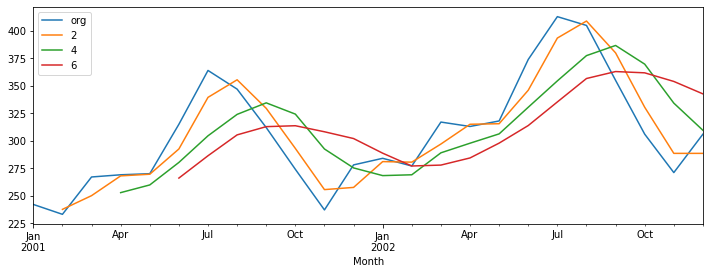

In [70]:
plt.figure(figsize=(12,4))
Airlines_data_test['Passengers'].plot(label="org")
for i in range(2,8,2):
    Airlines_data_test['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

## Evaluation Metric RMSE

In [71]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

## 2. Simple Exponential Method

In [72]:
ses_model = SimpleExpSmoothing(Airlines_data_train["Passengers"]).fit()
pred_ses = ses_model.predict(start = Airlines_data_test.index[0],end =Airlines_data_test.index[-1])
rmse_ses_model= RMSE(Airlines_data_test.Passengers, pred_ses)
rmse_ses_model

91.11325402904403

## 3. Holt Method

In [73]:
hw_model = Holt(Airlines_data_train["Passengers"]).fit()
pred_hw = hw_model.predict(start = Airlines_data_test.index[0],end = Airlines_data_test.index[-1])
rmse_hw_model = RMSE(Airlines_data_test.Passengers, pred_hw)
rmse_hw_model

71.64092572375277

### a. Holts winter exponential smoothing with additive seasonality and additive trend

In [74]:
hwe_model_add_add = ExponentialSmoothing(Airlines_data_train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Airlines_data_test.index[0],end = Airlines_data_test.index[-1])
rmse_hwe_add_add_model = RMSE(Airlines_data_test.Passengers, pred_hwe_add_add)
rmse_hwe_add_add_model

47.57079569932803

### b. Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [75]:
hwe_model_mul_add = ExponentialSmoothing(Airlines_data_train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Airlines_data_test.index[0],end = Airlines_data_test.index[-1])
rmse_hwe_model_mul_add_model = RMSE( Airlines_data_test.Passengers, pred_hwe_mul_add)
rmse_hwe_model_mul_add_model

34.989294364735954

## 4. ARIMA Model

### a. acf plot

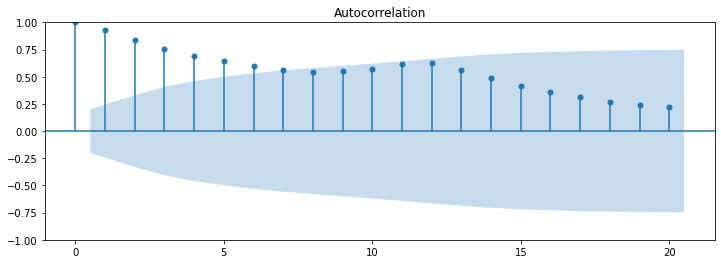

In [76]:
# Show autocorrelation upto lag 20
plt.figure(figsize=(12,4))
acf_plot = plot_acf(Airlines_data['Passengers'],ax=plt.gca(),lags=20)
plt.show()

### b. pacf plot

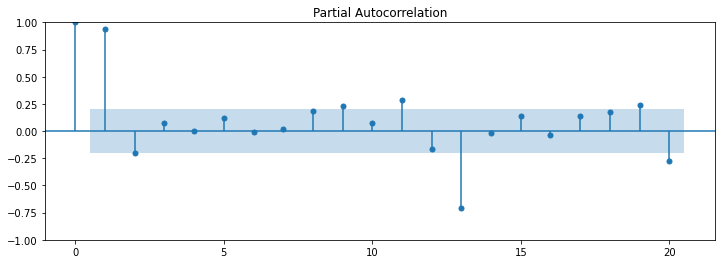

In [77]:
plt.figure(figsize=(12,4))
pacf_plot = plot_pacf(Airlines_data['Passengers'],ax=plt.gca(),lags=20)
plt.show()

In [78]:
arima = ARIMA(Airlines_data_train['Passengers'], order=(1,1,1)).fit()
pred_arima= arima.predict(start = Airlines_data_test.index[0],end = Airlines_data_test.index[-1])
rmse_arima = mean_squared_error(Airlines_data_test['Passengers'],pred_arima,squared=False).round(2)
rmse_arima

88.96

## Choosing the best model

In [79]:
models=['Simple_Moving_Average','Simple_Exponential_Smoothing','Holt','Holt_additive','Holt_multiplicative','ARIMA']
rmse=[rmse_ma,rmse_ses_model,rmse_hw_model,rmse_hwe_add_add_model,rmse_hwe_model_mul_add_model,rmse_arima]
d={'Models':models,'Rmse':rmse}
Airlines_data_model=pd.DataFrame(d)
Airlines_data_model

,Models,Rmse
0,Simple_Moving_Average,90.270000
1,Simple_Exponential_Smoothing,91.113254
2,Holt,71.640926
3,Holt_additive,47.570796
4,Holt_multiplicative,34.989294
5,ARIMA,88.960000


In [80]:
Airlines_data_model.sort_values(by='Rmse')

,Models,Rmse
4,Holt_multiplicative,34.989294
3,Holt_additive,47.570796
2,Holt,71.640926
5,ARIMA,88.960000
0,Simple_Moving_Average,90.270000
1,Simple_Exponential_Smoothing,91.113254


## Inference

#### Holts winter exponential smoothing with multiplicative seasonality and additive trend is the best model as it has least Rmse.